In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Import 'Box Office Mojo' database
bom_df = pd.read_csv('./zippedData/bom.movie_gross.csv')

bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
#Import 'The Movie Database'
tmdb_df = pd.read_csv('./zippedData/tmdb.movies.csv')

tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [4]:
#Merge 'Box Office Mojo' and 'The Movie Database' on title
#Disregard values not common to both tables
bom_tmdb_df = pd.merge(bom_df, tmdb_df, on = 'title', how = 'inner')

bom_tmdb_df.head()

,title,studio,domestic_gross,foreign_gross,year,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,vote_average,vote_count
0,Toy Story 3,BV,415000000.0,652000000,2010,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,7.7,8340
1,Inception,WB,292600000.0,535700000,2010,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,8.3,22186
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,38,"[35, 12, 14, 16, 10751]",10192,en,Shrek Forever After,15.041,2010-05-16,6.1,3843
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,15,"[12, 14, 18, 10749]",24021,en,The Twilight Saga: Eclipse,20.340,2010-06-23,6.0,4909
4,Iron Man 2,Par.,312400000.0,311500000,2010,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,6.8,12368


In [5]:
bom_df.shape

(3387, 5)

In [6]:
tmdb_df.shape

(26517, 10)

In [7]:
#Determine rows/columns of newly created dataframe
bom_tmdb_df.shape

(2703, 14)

In [8]:
#Import movie plot synopses database
mpst_df = pd.read_csv('./zippedData/mpst-movie-plot-synopses-with-tags/mpst_full_data.csv')

mpst_df.head()

,imdb_id,title,plot_synopsis,tags,split,synopsis_source
0,tt0057603,I tre volti della paura,Note: this synopsis is for the orginal Italian...,"cult, horror, gothic, murder, atmospheric",train,imdb
1,tt1733125,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a s...",violence,train,imdb
2,tt0033045,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the ...",romantic,test,imdb
3,tt0113862,Mr. Holland's Opus,"Glenn Holland, not a morning person by anyone'...","inspiring, romantic, stupid, feel-good",train,imdb
4,tt0086250,Scarface,"In May 1980, a Cuban man named Tony Montana (A...","cruelty, murder, dramatic, cult, violence, atm...",val,imdb


In [9]:
#Merge datasets together
bom_tmdb_mpst_df = pd.merge(bom_tmdb_df, mpst_df, on = 'title', how = 'inner')

bom_tmdb_mpst_df.head()

,title,studio,domestic_gross,foreign_gross,year,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,vote_average,vote_count,imdb_id,plot_synopsis,tags,split,synopsis_source
0,Toy Story 3,BV,415000000.0,652000000,2010,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,7.7,8340,tt0435761,Andy Davis (voice: John Morris) is 17 years ol...,"comedy, boring, violence, flashback, good vers...",train,imdb
1,Inception,WB,292600000.0,535700000,2010,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,8.3,22186,tt1375666,"A young man, exhausted and delirious, washes u...","boring, neo noir, murder, sentimental, fantasy...",val,imdb
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,38,"[35, 12, 14, 16, 10751]",10192,en,Shrek Forever After,15.041,2010-05-16,6.1,3843,tt0892791,The movie begins just before Shrek (voiced by ...,"comedy, fantasy, action",train,imdb
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,15,"[12, 14, 18, 10749]",24021,en,The Twilight Saga: Eclipse,20.340,2010-06-23,6.0,4909,tt1325004,Eclipse opens at nighttime where Riley Biers (...,"paranormal, revenge, murder, entertaining, fla...",train,imdb
4,Iron Man 2,Par.,312400000.0,311500000,2010,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,6.8,12368,tt1228705,The movie opens several months after the event...,"good versus evil, revenge, humor, action, murder",train,imdb


In [10]:
bom_tmdb_mpst_df.shape

(1282, 19)

In [11]:
imdb_title_basics_df = pd.read_csv('./zippedData/imdb.title.basics.csv')

#Import IMDB title basics database
imdb_title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [12]:
# rename primary_title to title so we can merge it with our existing database on the title column
imdb_title_basics_df.rename(columns = {'primary_title': 'title'}, inplace = True)

In [13]:
#Merge datasets
tmdb_imdb_df = pd.merge(imdb_title_basics_df, tmdb_df, on = 'title', how = 'inner')

tmdb_imdb_df.head()


,tconst,title,original_title_x,start_year,runtime_minutes,genres,Unnamed: 0,genre_ids,id,original_language,original_title_y,popularity,release_date,vote_average,vote_count
0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,24185,"[35, 18]",299782,en,The Other Side of the Wind,9.800,2018-11-02,7.0,64
1,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",5872,"[27, 878, 12]",117856,en,Bigfoot,2.813,2012-06-30,2.9,26
2,tt4503112,Bigfoot,Bigfoot,2018,NaN,"Action,Horror",5872,"[27, 878, 12]",117856,en,Bigfoot,2.813,2012-06-30,2.9,26
3,tt9181914,Bigfoot,Bigfoot,2018,86.0,"Animation,Family",5872,"[27, 878, 12]",117856,en,Bigfoot,2.813,2012-06-30,2.9,26
4,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,26332,[18],567662,en,Heaven & Hell,0.600,2018-11-06,7.5,2


In [14]:
#Import ratings database
imdb_title_ratings_df = pd.read_csv('./zippedData/imdb.title.ratings.csv')

imdb_title_ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [15]:
#Merge datasets
rating_tmdb_imdb_df = pd.merge(tmdb_imdb_df, imdb_title_ratings_df, on='tconst', how = 'inner')

In [16]:
rating_tmdb_imdb_df.head()

,tconst,title,original_title_x,start_year,runtime_minutes,genres,Unnamed: 0,genre_ids,id,original_language,original_title_y,popularity,release_date,vote_average,vote_count,averagerating,numvotes
0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,24185,"[35, 18]",299782,en,The Other Side of the Wind,9.800,2018-11-02,7.0,64,6.9,4517
1,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",5872,"[27, 878, 12]",117856,en,Bigfoot,2.813,2012-06-30,2.9,26,4.1,32
2,tt4503112,Bigfoot,Bigfoot,2018,NaN,"Action,Horror",5872,"[27, 878, 12]",117856,en,Bigfoot,2.813,2012-06-30,2.9,26,4.6,9
3,tt9181914,Bigfoot,Bigfoot,2018,86.0,"Animation,Family",5872,"[27, 878, 12]",117856,en,Bigfoot,2.813,2012-06-30,2.9,26,2.5,55
4,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,26332,[18],567662,en,Heaven & Hell,0.600,2018-11-06,7.5,2,4.0,72


In [17]:
#Merge datasets
merged_df = pd.merge(rating_tmdb_imdb_df, bom_tmdb_mpst_df, on='title', how='inner')

In [18]:
merged_df.head()

,tconst,title,original_title_x,start_year,runtime_minutes,genres,Unnamed: 0_x,genre_ids_x,id_x,original_language_x,...,original_title,popularity_y,release_date_y,vote_average_y,vote_count_y,imdb_id,plot_synopsis,tags,split,synopsis_source
0,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",5350,"[12, 18]",83770,en,...,On the Road,8.919,2012-12-21,5.6,518,tt0337692,The two main characters of the book are the na...,flashback,train,wikipedia
1,tt4339118,On the Road,On the Road,2014,89.0,Drama,5350,"[12, 18]",83770,en,...,On the Road,8.919,2012-12-21,5.6,518,tt0337692,The two main characters of the book are the na...,flashback,train,wikipedia
2,tt5647250,On the Road,On the Road,2016,121.0,Drama,5350,"[12, 18]",83770,en,...,On the Road,8.919,2012-12-21,5.6,518,tt0337692,The two main characters of the book are the na...,flashback,train,wikipedia
3,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",11053,"[80, 18, 9648, 53]",169917,en,...,A Walk Among the Tombstones,19.373,2014-09-19,6.3,1685,tt0365907,"New York City, 1991Detective Matt Scudder (Lia...","suspenseful, neo noir, murder, violence, flash...",val,imdb
4,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",14193,"[28, 12, 878, 53]",135397,en,...,Jurassic World,20.709,2015-06-12,6.6,14056,tt0369610,Following the demise of dinosaur-themed Jurass...,"violence, satire",train,wikipedia


In [19]:
merged_df.columns

Index(['tconst', 'title', 'original_title_x', 'start_year', 'runtime_minutes',
       'genres', 'Unnamed: 0_x', 'genre_ids_x', 'id_x', 'original_language_x',
       'original_title_y', 'popularity_x', 'release_date_x', 'vote_average_x',
       'vote_count_x', 'averagerating', 'numvotes', 'studio', 'domestic_gross',
       'foreign_gross', 'year', 'Unnamed: 0_y', 'genre_ids_y', 'id_y',
       'original_language_y', 'original_title', 'popularity_y',
       'release_date_y', 'vote_average_y', 'vote_count_y', 'imdb_id',
       'plot_synopsis', 'tags', 'split', 'synopsis_source'],
      dtype='object')

In [20]:
#Drop unnecessary columns
merged_df.drop(columns=['original_title_x', 'start_year', 'Unnamed: 0_x', 'genre_ids_x', 'original_language_x', 'original_title_y', 'popularity_x', 'release_date_x', 'vote_average_x', 'vote_count_x', 'foreign_gross', 'year', 'Unnamed: 0_y', 'genre_ids_y', 'original_language_y', 'original_title', 'imdb_id', 'plot_synopsis', 'split', 'synopsis_source',], inplace=True)

In [21]:
#Drop additional columns
merged_df.drop(columns=['runtime_minutes', 'id_y', 'tags'], inplace=True)
merged_df.head()

,tconst,title,genres,id_x,averagerating,numvotes,studio,domestic_gross,popularity_y,release_date_y,vote_average_y,vote_count_y
0,tt0337692,On the Road,"Adventure,Drama,Romance",83770,6.1,37886,IFC,744000.0,8.919,2012-12-21,5.6,518
1,tt4339118,On the Road,Drama,83770,6.0,6,IFC,744000.0,8.919,2012-12-21,5.6,518
2,tt5647250,On the Road,Drama,83770,5.7,127,IFC,744000.0,8.919,2012-12-21,5.6,518
3,tt0365907,A Walk Among the Tombstones,"Action,Crime,Drama",169917,6.5,105116,Uni.,26300000.0,19.373,2014-09-19,6.3,1685
4,tt0369610,Jurassic World,"Action,Adventure,Sci-Fi",135397,7.0,539338,Uni.,652300000.0,20.709,2015-06-12,6.6,14056


In [22]:
#drop column
merged_df.drop(columns=['id_x'], inplace=True)

In [23]:
#Rename columns
merged_df.rename(columns={'popularity_y':'popularity', 'release_date_y':'release_date', 'vote_average_y':'vote_average', 'vote_count_y':'vote_count'}, inplace=True)

In [24]:
merged_df.head()

,tconst,title,genres,averagerating,numvotes,studio,domestic_gross,popularity,release_date,vote_average,vote_count
0,tt0337692,On the Road,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8.919,2012-12-21,5.6,518
1,tt4339118,On the Road,Drama,6.0,6,IFC,744000.0,8.919,2012-12-21,5.6,518
2,tt5647250,On the Road,Drama,5.7,127,IFC,744000.0,8.919,2012-12-21,5.6,518
3,tt0365907,A Walk Among the Tombstones,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,19.373,2014-09-19,6.3,1685
4,tt0369610,Jurassic World,"Action,Adventure,Sci-Fi",7.0,539338,Uni.,652300000.0,20.709,2015-06-12,6.6,14056


In [25]:
merged_df.shape

(2556, 11)

In [26]:
#Drop rows with duplicate values
merged_df.drop_duplicates(subset='domestic_gross', inplace=True)

In [27]:
merged_df.head()

,tconst,title,genres,averagerating,numvotes,studio,domestic_gross,popularity,release_date,vote_average,vote_count
0,tt0337692,On the Road,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8.919,2012-12-21,5.6,518
3,tt0365907,A Walk Among the Tombstones,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,19.373,2014-09-19,6.3,1685
4,tt0369610,Jurassic World,"Action,Adventure,Sci-Fi",7.0,539338,Uni.,652300000.0,20.709,2015-06-12,6.6,14056
5,tt0372538,Spy,"Action,Crime,Drama",6.6,78,Fox,110800000.0,1.400,2011-08-09,7.0,1
13,tt0376479,American Pastoral,"Crime,Drama",6.1,12898,LGF,544000.0,7.782,2016-10-21,6.0,339


In [28]:
merged_df.shape

(721, 11)

In [29]:
type(merged_df['genres'][0])

str

In [30]:
type(merged_df['release_date'][0])

str

In [31]:
#Create new column 'month' from release_date
merged_df['month'] = merged_df['release_date'].apply(lambda x: x.split('-'))

In [32]:
from dateutil.parser import parse

In [33]:
#Convert 'month' to 'datetime' datatype
merged_df['release_date'] = merged_df['release_date'].apply(lambda x: parse(x))

In [34]:
merged_df.head()

,tconst,title,genres,averagerating,numvotes,studio,domestic_gross,popularity,release_date,vote_average,vote_count,month
0,tt0337692,On the Road,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8.919,2012-12-21,5.6,518,"[2012, 12, 21]"
3,tt0365907,A Walk Among the Tombstones,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,19.373,2014-09-19,6.3,1685,"[2014, 09, 19]"
4,tt0369610,Jurassic World,"Action,Adventure,Sci-Fi",7.0,539338,Uni.,652300000.0,20.709,2015-06-12,6.6,14056,"[2015, 06, 12]"
5,tt0372538,Spy,"Action,Crime,Drama",6.6,78,Fox,110800000.0,1.400,2011-08-09,7.0,1,"[2011, 08, 09]"
13,tt0376479,American Pastoral,"Crime,Drama",6.1,12898,LGF,544000.0,7.782,2016-10-21,6.0,339,"[2016, 10, 21]"


In [35]:
merged_df['month'] = merged_df['release_date']

In [36]:
#Set the datetime object to the month only
merged_df['month'] = merged_df['month'].apply(lambda x: x.month)

In [37]:
merged_df.head()

,tconst,title,genres,averagerating,numvotes,studio,domestic_gross,popularity,release_date,vote_average,vote_count,month
0,tt0337692,On the Road,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8.919,2012-12-21,5.6,518,12
3,tt0365907,A Walk Among the Tombstones,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,19.373,2014-09-19,6.3,1685,9
4,tt0369610,Jurassic World,"Action,Adventure,Sci-Fi",7.0,539338,Uni.,652300000.0,20.709,2015-06-12,6.6,14056,6
5,tt0372538,Spy,"Action,Crime,Drama",6.6,78,Fox,110800000.0,1.400,2011-08-09,7.0,1,8
13,tt0376479,American Pastoral,"Crime,Drama",6.1,12898,LGF,544000.0,7.782,2016-10-21,6.0,339,10


In [38]:
#Split 'genres' into list of values
merged_df['genres'] = merged_df['genres'].apply(lambda x: x.split(','))
merged_df.head()

,tconst,title,genres,averagerating,numvotes,studio,domestic_gross,popularity,release_date,vote_average,vote_count,month
0,tt0337692,On the Road,"[Adventure, Drama, Romance]",6.1,37886,IFC,744000.0,8.919,2012-12-21,5.6,518,12
3,tt0365907,A Walk Among the Tombstones,"[Action, Crime, Drama]",6.5,105116,Uni.,26300000.0,19.373,2014-09-19,6.3,1685,9
4,tt0369610,Jurassic World,"[Action, Adventure, Sci-Fi]",7.0,539338,Uni.,652300000.0,20.709,2015-06-12,6.6,14056,6
5,tt0372538,Spy,"[Action, Crime, Drama]",6.6,78,Fox,110800000.0,1.400,2011-08-09,7.0,1,8
13,tt0376479,American Pastoral,"[Crime, Drama]",6.1,12898,LGF,544000.0,7.782,2016-10-21,6.0,339,10


In [39]:
#Drop column 'genre'
merged_df.drop(columns=['genre'])

KeyError: "['genre'] not found in axis"

In [40]:
#Find the average gross per month
avg_gross_month = merged_df.groupby(['month']).mean()['domestic_gross']
avg_gross_month

month
1     4.169886e+07
2     5.847270e+07
3     6.691723e+07
4     3.518441e+07
5     9.662538e+07
6     1.017212e+08
7     8.840903e+07
8     5.423179e+07
9     5.068872e+07
10    4.036132e+07
11    8.287959e+07
12    7.692566e+07
Name: domestic_gross, dtype: float64

In [41]:
#Create new dataframe for all movies released in January
jan_df = merged_df[merged_df['month']==1]

In [42]:
jan_df.head()

,tconst,title,genres,averagerating,numvotes,studio,domestic_gross,popularity,release_date,vote_average,vote_count,month
85,tt0472399,The Mechanic,"[Action, Crime, Thriller]",6.6,141254,CBS,29100000.0,14.387,2011-01-28,6.3,1676,1
141,tt0479997,Season of the Witch,"[Action, Adventure, Fantasy]",5.4,85777,Rela.,24800000.0,12.535,2011-01-07,5.3,1352,1
167,tt0808510,Tooth Fairy,"[Comedy, Family, Fantasy]",5.0,37939,Fox,60000000.0,12.650,2010-01-22,5.3,1058,1
196,tt0882977,Snitch,"[Action, Drama, Thriller]",6.5,78142,LG/S,42900000.0,0.600,2011-01-01,1.0,1,1
204,tt0884732,The Wedding Ringer,[Comedy],6.7,66893,SGem,64500000.0,15.876,2015-01-16,6.5,961,1


In [43]:
#Do the same for movies released in each month
feb_df = merged_df[merged_df['month']==2]
march_df = merged_df[merged_df['month']==3]
april_df = merged_df[merged_df['month']==4]
may_df = merged_df[merged_df['month']==5]
jun_df = merged_df[merged_df['month']==6]
jul_df = merged_df[merged_df['month']==7]
aug_df = merged_df[merged_df['month']==8]
sept_df = merged_df[merged_df['month']==9]
oct_df = merged_df[merged_df['month']==10]
nov_df = merged_df[merged_df['month']==11]
dec_df = merged_df[merged_df['month']==12]

In [44]:
dec_df.head()

,tconst,title,genres,averagerating,numvotes,studio,domestic_gross,popularity,release_date,vote_average,vote_count,month
0,tt0337692,On the Road,"[Adventure, Drama, Romance]",6.1,37886,IFC,744000.0,8.919,2012-12-21,5.6,518,12
138,tt0477302,Extremely Loud & Incredibly Close,"[Adventure, Drama, Mystery]",6.9,93164,WB,31800000.0,9.828,2011-12-24,7.0,1231,12
161,tt0790724,Jack Reacher,"[Action, Crime, Thriller]",7.0,284547,Par.,80100000.0,18.312,2012-12-21,6.4,4155,12
210,tt0903624,The Hobbit: An Unexpected Journey,"[Adventure, Family, Fantasy]",7.9,719629,WB (NL),303000000.0,26.939,2012-12-14,7.2,12076,12
214,tt0935075,Rabbit Hole,[Drama],7.0,45357,LGF,2200000.0,9.389,2010-12-16,6.8,292,12


In [45]:
merged_df.head()

,tconst,title,genres,averagerating,numvotes,studio,domestic_gross,popularity,release_date,vote_average,vote_count,month
0,tt0337692,On the Road,"[Adventure, Drama, Romance]",6.1,37886,IFC,744000.0,8.919,2012-12-21,5.6,518,12
3,tt0365907,A Walk Among the Tombstones,"[Action, Crime, Drama]",6.5,105116,Uni.,26300000.0,19.373,2014-09-19,6.3,1685,9
4,tt0369610,Jurassic World,"[Action, Adventure, Sci-Fi]",7.0,539338,Uni.,652300000.0,20.709,2015-06-12,6.6,14056,6
5,tt0372538,Spy,"[Action, Crime, Drama]",6.6,78,Fox,110800000.0,1.400,2011-08-09,7.0,1,8
13,tt0376479,American Pastoral,"[Crime, Drama]",6.1,12898,LGF,544000.0,7.782,2016-10-21,6.0,339,10


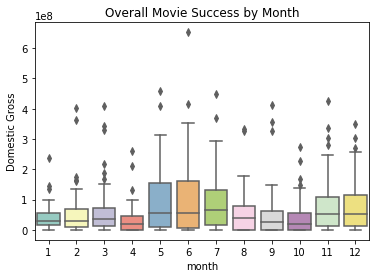

In [46]:
#Plot domestic gross per month with a boxplot
import seaborn as sns

ax = sns.boxplot(x="month", y="domestic_gross", data=merged_df, palette="Set3").set(ylabel= "Domestic Gross", title = 'Overall Movie Success by Month')

plt.show()

In [47]:
# make a list of all the items in the genres column, 
# what will be returned is a list of lists, since each cell in the data contains a list
nested_list_genres = list(merged_df['genres'])
# make this list of lists into a single flattened list
genre_list = [item for sublist in nested_list_genres for item in sublist]


In [56]:
import movie_functions as mov

In [57]:
# run through the flattened list of genres and return all the unique values in that list
unique_genres = mov.unique(genre_list)
unique_genres

['Adventure',
 'Drama',
 'Romance',
 'Action',
 'Crime',
 'Sci-Fi',
 'Comedy',
 'Family',
 'Animation',
 'Thriller',
 'Mystery',
 'Horror',
 'Biography',
 'History',
 'Fantasy',
 'Music',
 'War',
 'Sport',
 'Western',
 'Documentary',
 'Musical']

In [64]:
# export dataframe as a csv file
merged_df.to_csv("merged.csv", index=False)

In [59]:
# create an Adventure dummy variable column, 
# function creates a list of zeroes for the length of the dataframe
# looks at the list of all the entries in the genres column, 
# if the genres entry for a row at a specific index contains 'Adventure', the zero at that index becomes a one
merged_df['Adventure'] = mov.adventure(nested_list_genres)

In [60]:
merged_df.head()

,tconst,title,genres,averagerating,numvotes,studio,domestic_gross,popularity,release_date,vote_average,...,Animation,Thriller,Mystery,Horror,Biography,History,Fantasy,Music,War,Sport
0,tt0337692,On the Road,"[Adventure, Drama, Romance]",6.1,37886,IFC,744000.0,8.919,2012-12-21,5.6,...,0,0,0,0,0,0,0,0,0,0
3,tt0365907,A Walk Among the Tombstones,"[Action, Crime, Drama]",6.5,105116,Uni.,26300000.0,19.373,2014-09-19,6.3,...,0,0,0,0,0,0,0,0,0,0
4,tt0369610,Jurassic World,"[Action, Adventure, Sci-Fi]",7.0,539338,Uni.,652300000.0,20.709,2015-06-12,6.6,...,0,0,0,0,0,0,0,0,0,0
5,tt0372538,Spy,"[Action, Crime, Drama]",6.6,78,Fox,110800000.0,1.400,2011-08-09,7.0,...,0,0,0,0,0,0,0,0,0,0
13,tt0376479,American Pastoral,"[Crime, Drama]",6.1,12898,LGF,544000.0,7.782,2016-10-21,6.0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
merged_df['Drama'] = mov.drama(nested_list_genres)
merged_df['Romance'] = mov.romance(nested_list_genres)
merged_df['Action'] = mov.action(nested_list_genres)
merged_df['Crime'] = mov.crime(nested_list_genres)
merged_df['Sci-fi'] = mov.scifi(nested_list_genres)
merged_df['Comedy'] = mov.comedy(nested_list_genres)
merged_df['Family'] = mov.family(nested_list_genres)
merged_df['Animation'] = mov.animation(nested_list_genres)
merged_df['Thriller'] = mov.thriller(nested_list_genres)
merged_df['Mystery'] = mov.mystery(nested_list_genres)
merged_df['Horror'] = mov.horror(nested_list_genres)
merged_df['Biography'] = mov.biography(nested_list_genres)
merged_df['History'] = mov.history(nested_list_genres)
merged_df['Fantasy'] = mov.fantasy(nested_list_genres)
merged_df['Music'] = mov.music(nested_list_genres)
merged_df['War'] = mov.war(nested_list_genres)
merged_df['Sport'] = mov.sport(nested_list_genres)
merged_df['Western'] = mov.western(nested_list_genres)
merged_df['Documentary'] = mov.documentary(nested_list_genres)
merged_df['Musical'] = mov.musical(nested_list_genres)

NameError: name 'pd' is not defined

In [63]:
merged_df.head()

,tconst,title,genres,averagerating,numvotes,studio,domestic_gross,popularity,release_date,vote_average,...,Animation,Thriller,Mystery,Horror,Biography,History,Fantasy,Music,War,Sport
0,tt0337692,On the Road,"[Adventure, Drama, Romance]",6.1,37886,IFC,744000.0,8.919,2012-12-21,5.6,...,0,0,0,0,0,0,0,0,0,0
3,tt0365907,A Walk Among the Tombstones,"[Action, Crime, Drama]",6.5,105116,Uni.,26300000.0,19.373,2014-09-19,6.3,...,0,0,0,0,0,0,0,0,0,0
4,tt0369610,Jurassic World,"[Action, Adventure, Sci-Fi]",7.0,539338,Uni.,652300000.0,20.709,2015-06-12,6.6,...,0,0,0,0,0,0,0,0,0,0
5,tt0372538,Spy,"[Action, Crime, Drama]",6.6,78,Fox,110800000.0,1.400,2011-08-09,7.0,...,0,0,0,0,0,0,0,0,0,0
13,tt0376479,American Pastoral,"[Crime, Drama]",6.1,12898,LGF,544000.0,7.782,2016-10-21,6.0,...,0,0,0,0,0,0,0,0,0,0
